<a href="https://colab.research.google.com/github/KharismaPutriFadila/Numerik/blob/main/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load dataset
file_path = '/content/Large_Linear_Regression_Dataset.csv'
df = pd.read_csv(file_path)

In [6]:
#Eksplorasi data
print("Ukuran dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())

# Menampilkan 5 data teratas
df.head()


Ukuran dataset: (1200, 2)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1200 non-null   int64  
 1   y       1200 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 18.9 KB
None

Statistik deskriptif:
                 x            y
count  1200.000000  1200.000000
mean     53.078333    68.879251
std      25.966146    31.232447
min      10.000000     9.310763
25%      31.000000    42.626547
50%      52.000000    67.638646
75%      74.000000    93.568421
max      99.000000   132.397633


,x,y
0,66,89.250685
1,98,121.618694
2,59,70.329479
3,32,31.541922
4,40,50.811672


In [7]:
#Cek mising values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
x    0
y    0
dtype: int64


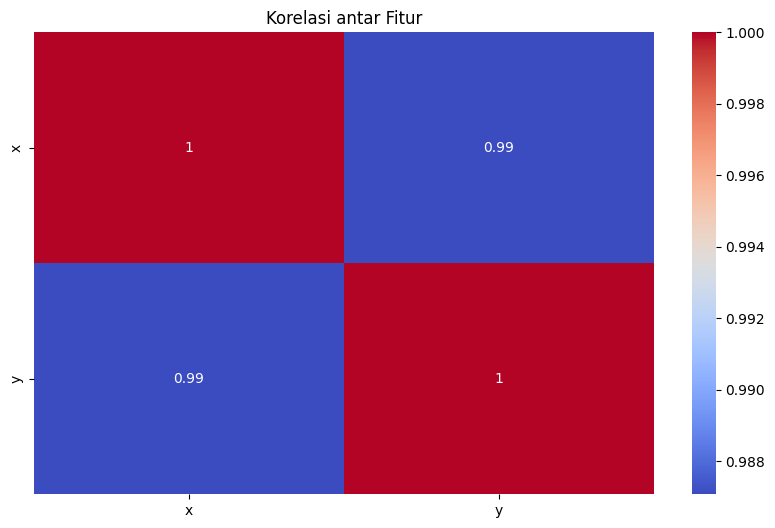

In [8]:
#Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur")
plt.show()


In [9]:
# pisahkan fitur dan taret
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [10]:
#split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Latih model linier regrision
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
#prediksi
y_pred = model.predict(X_test)


In [14]:
#Evaluasi model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 25.29651111505901
Root Mean Squared Error (RMSE): 5.029563710209764
R-squared (R²): 0.9733017081192958


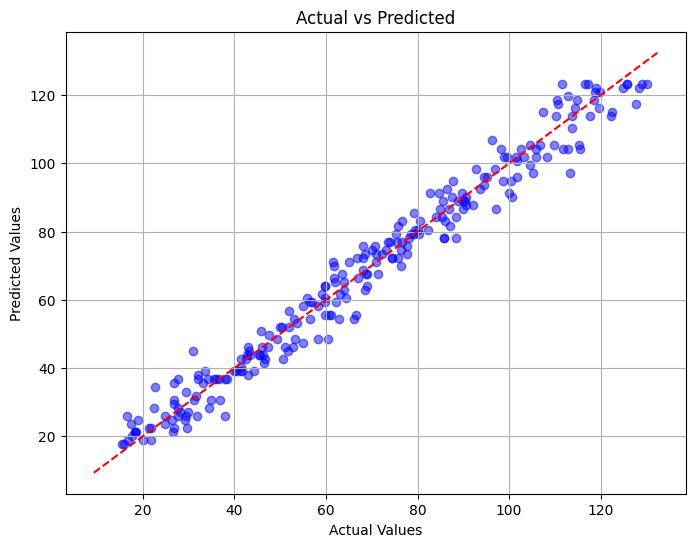

In [16]:
#Plot hasil prediksi dan aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()
